In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA

In [203]:
df=pd.read_csv('/content/ionosphere.csv')

In [204]:
df.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [205]:
df.shape

(350, 35)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1          350 non-null    int64  
 1   0          350 non-null    int64  
 2   0.99539    350 non-null    float64
 3   -0.05889   350 non-null    float64
 4   0.85243    350 non-null    float64
 5   0.02306    350 non-null    float64
 6   0.83398    350 non-null    float64
 7   -0.37708   350 non-null    float64
 8   1.1        350 non-null    float64
 9   0.03760    350 non-null    float64
 10  0.85243.1  350 non-null    float64
 11  -0.17755   350 non-null    float64
 12  0.59755    350 non-null    float64
 13  -0.44945   350 non-null    float64
 14  0.60536    350 non-null    float64
 15  -0.38223   350 non-null    float64
 16  0.84356    350 non-null    float64
 17  -0.38542   350 non-null    float64
 18  0.58212    350 non-null    float64
 19  -0.32192   350 non-null    float64
 20  0.56971   

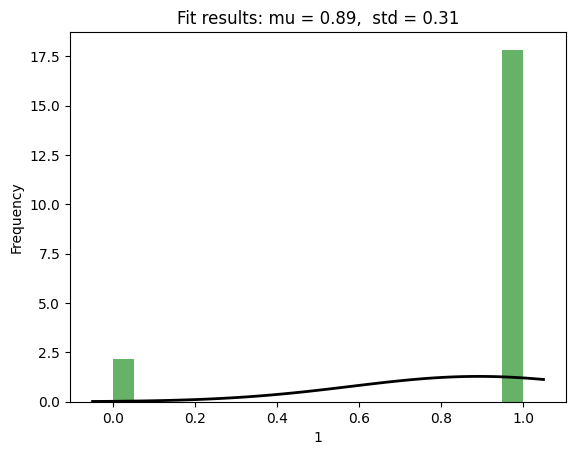

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


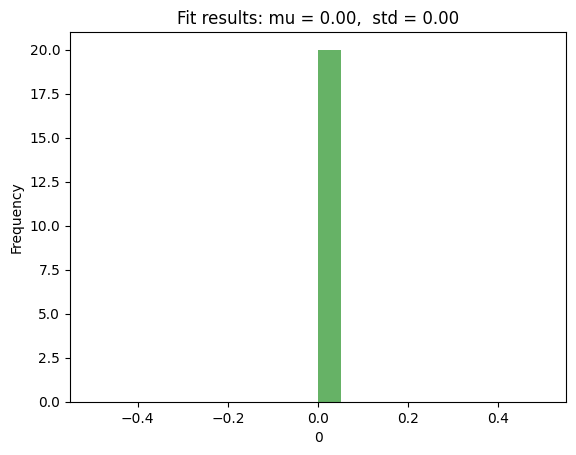

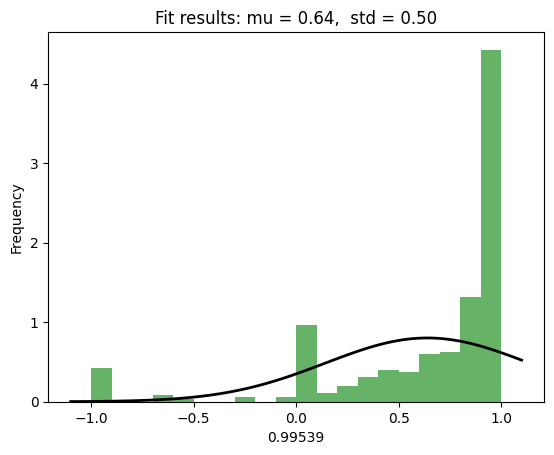

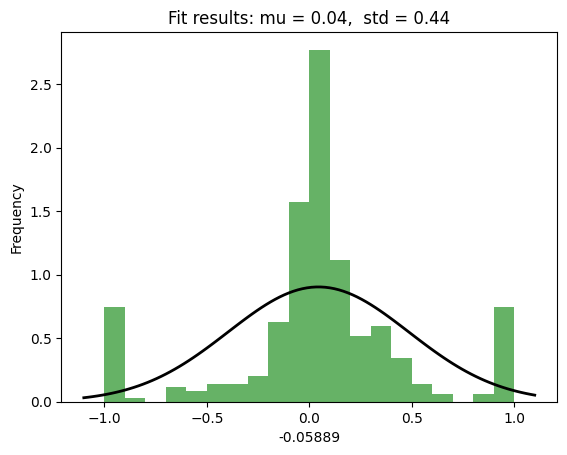

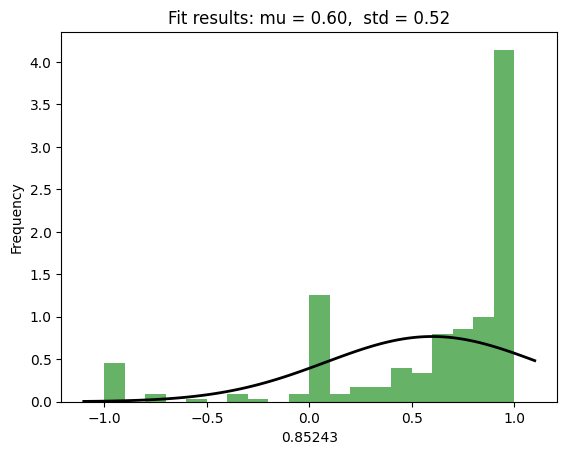

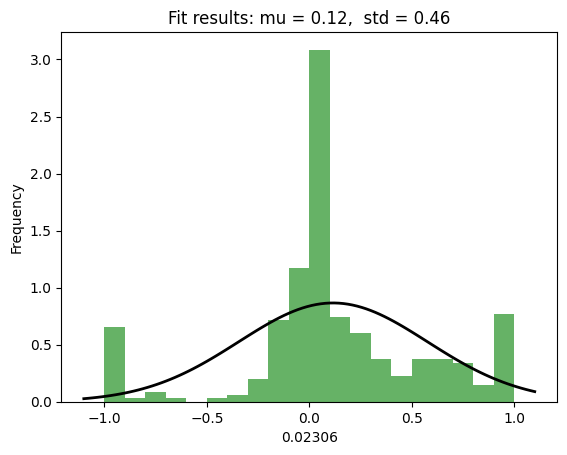

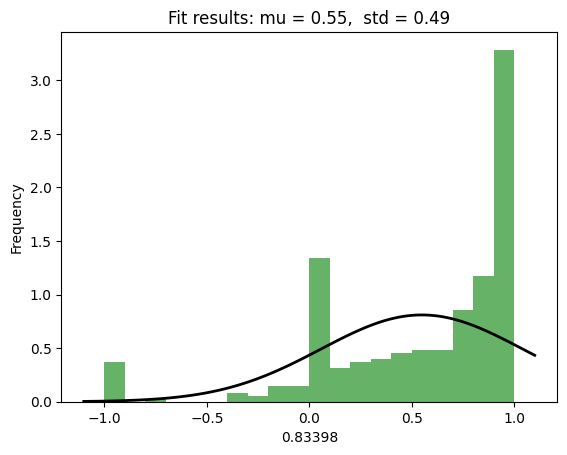

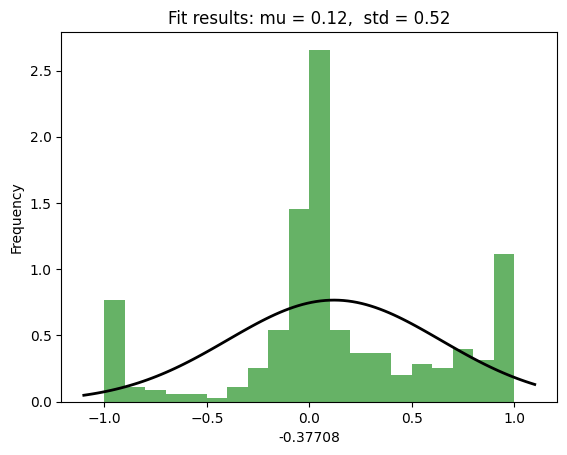

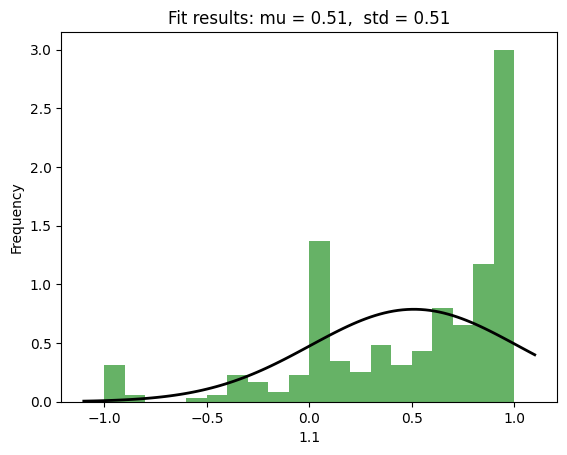

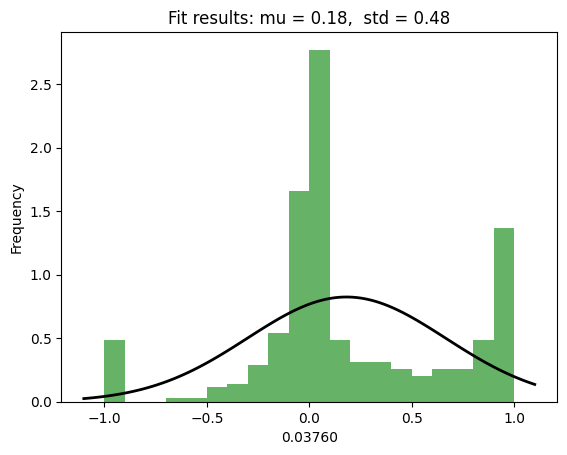

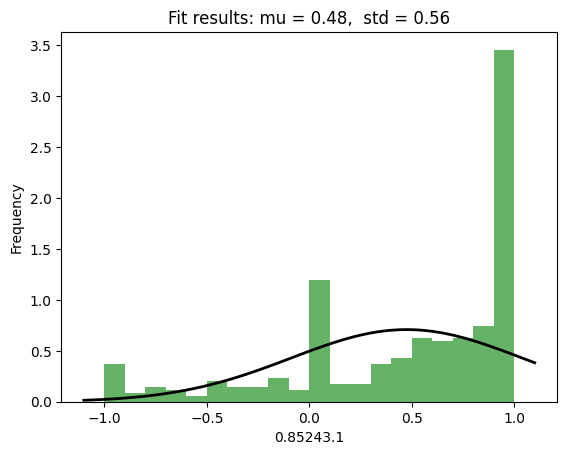

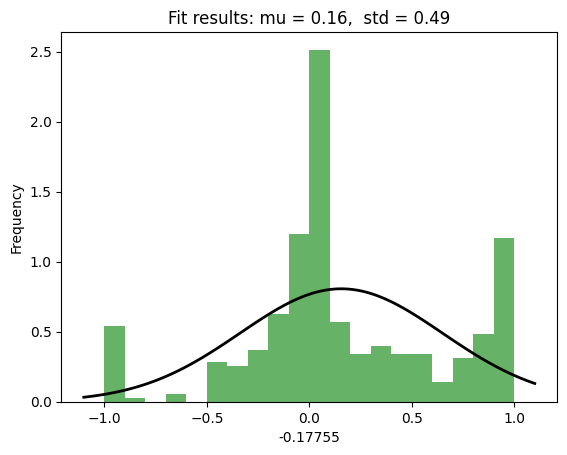

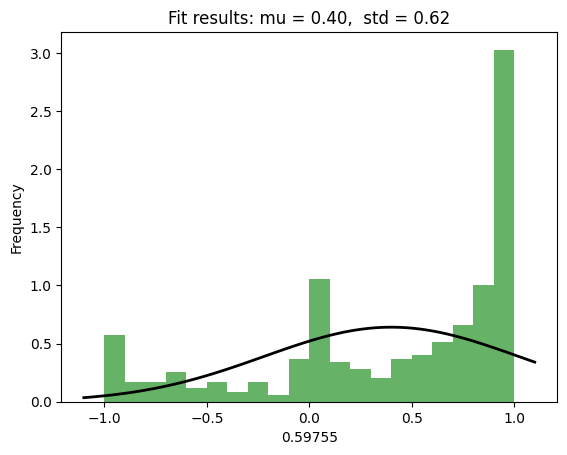

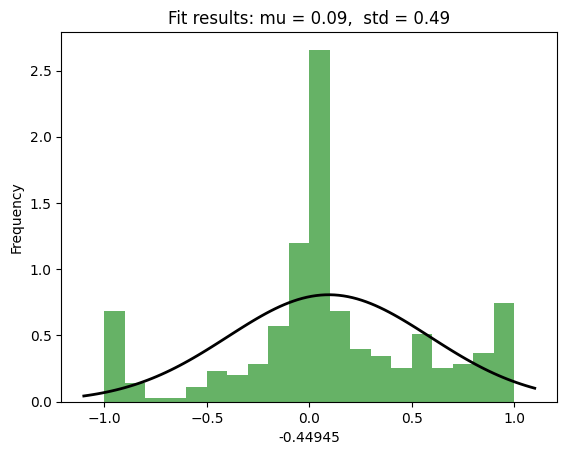

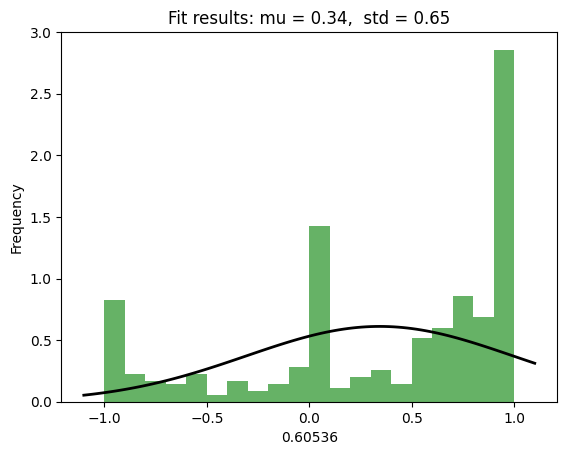

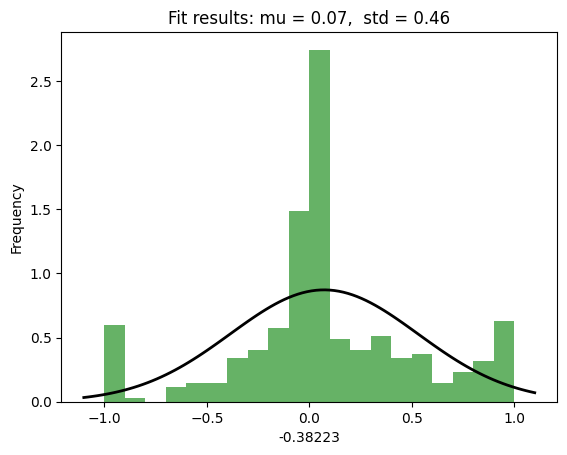

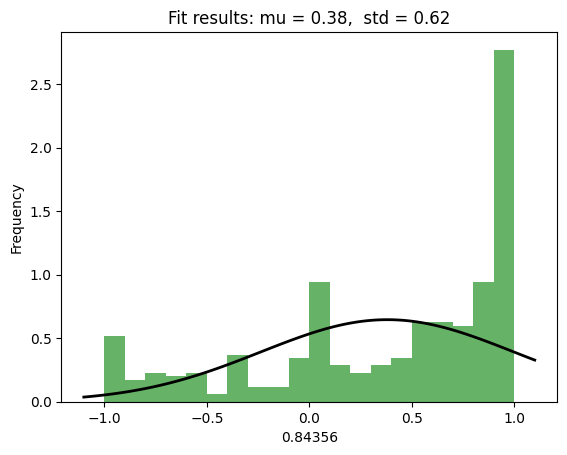

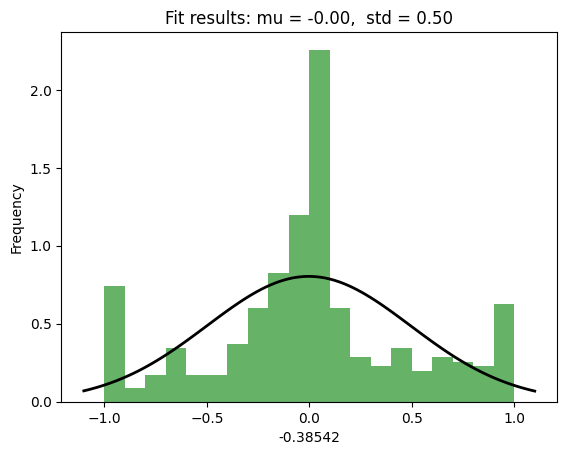

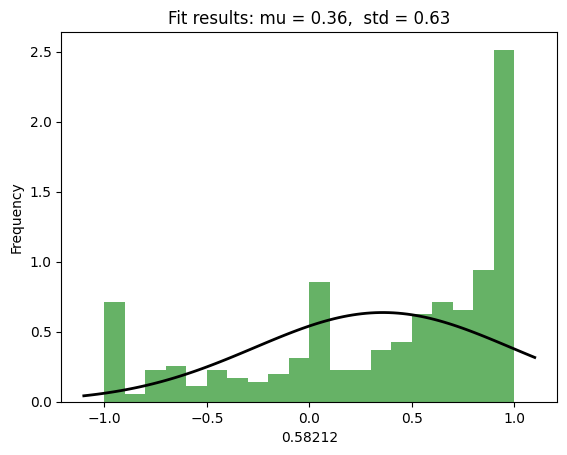

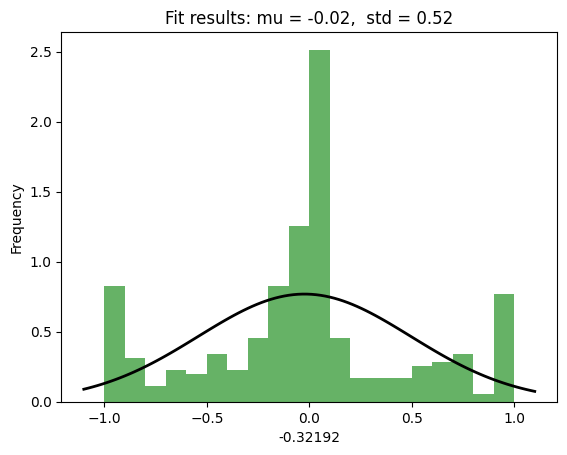

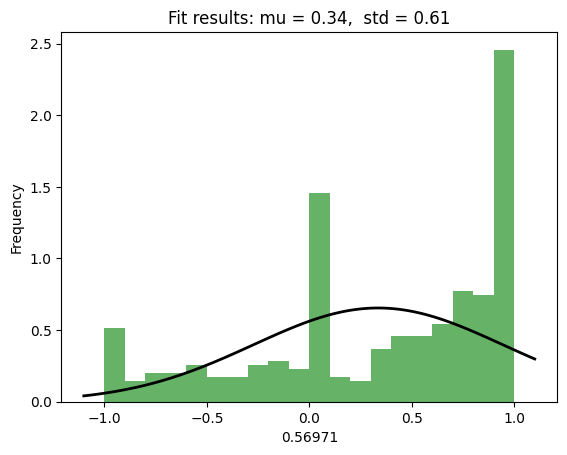

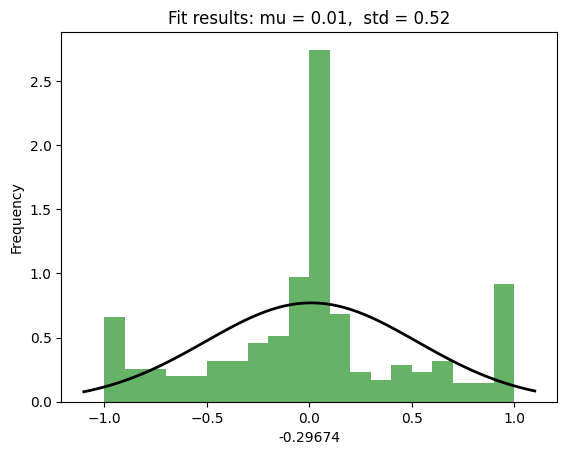

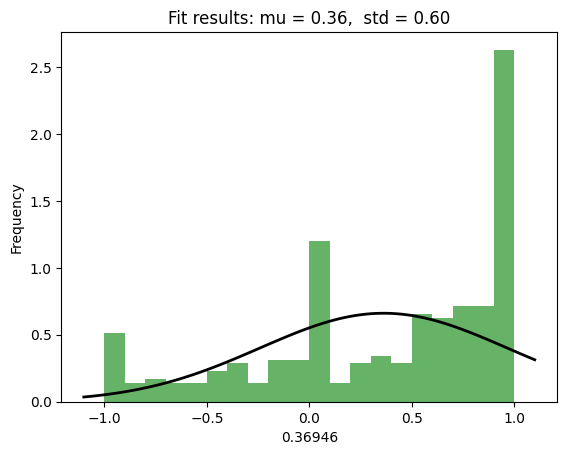

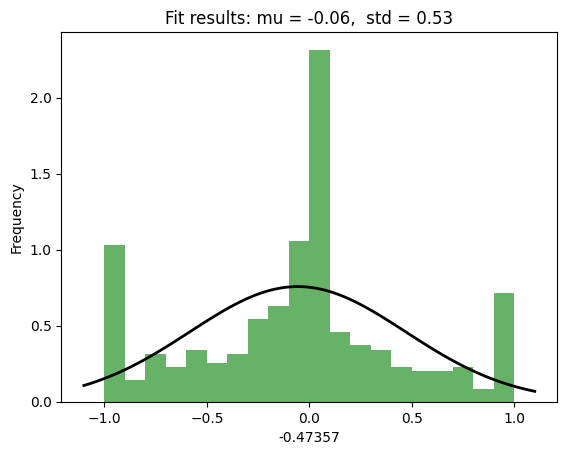

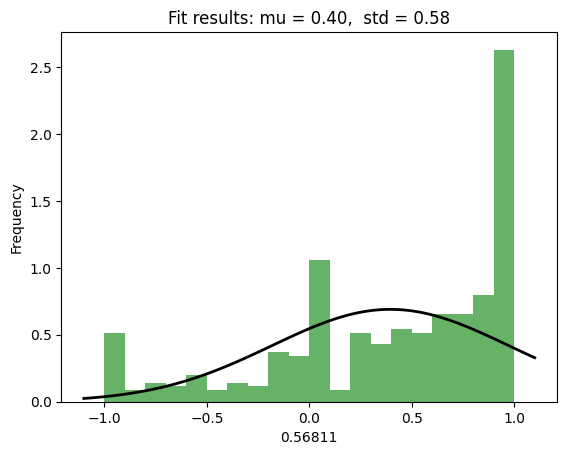

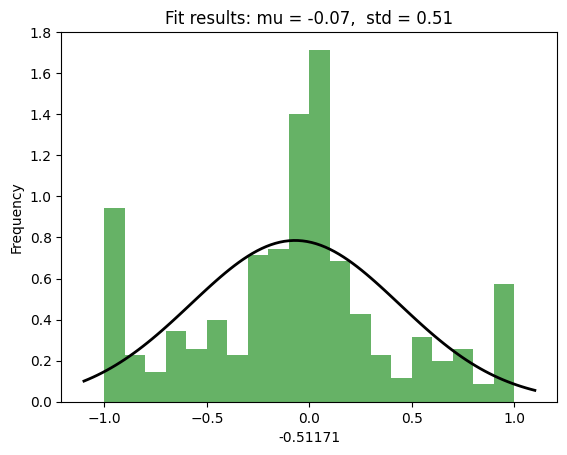

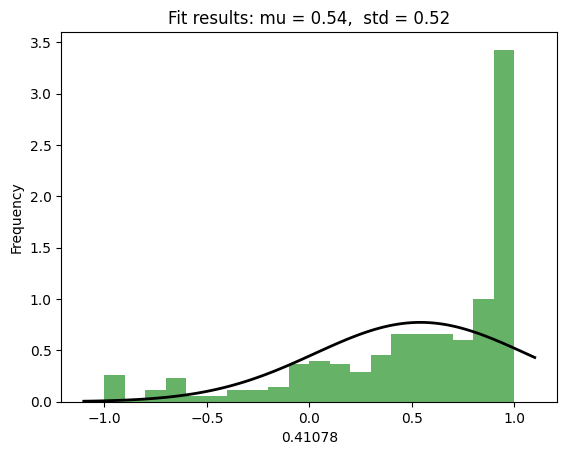

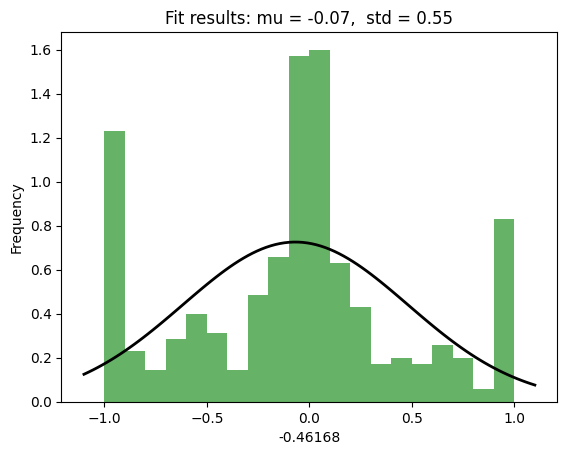

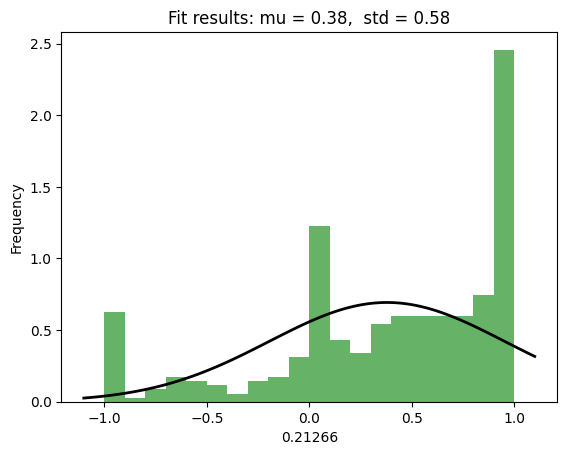

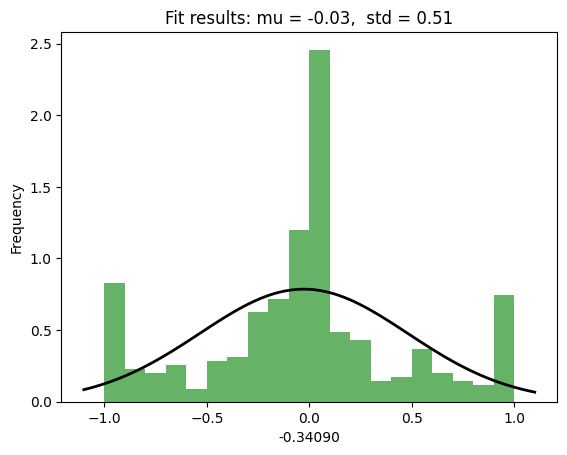

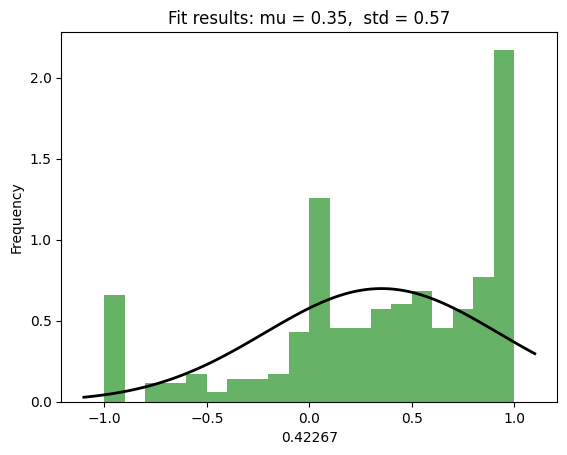

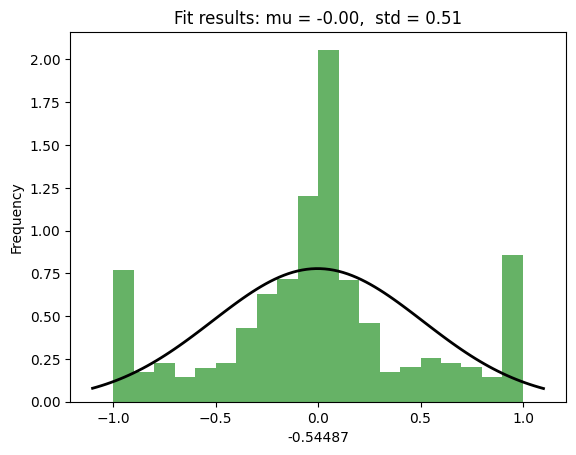

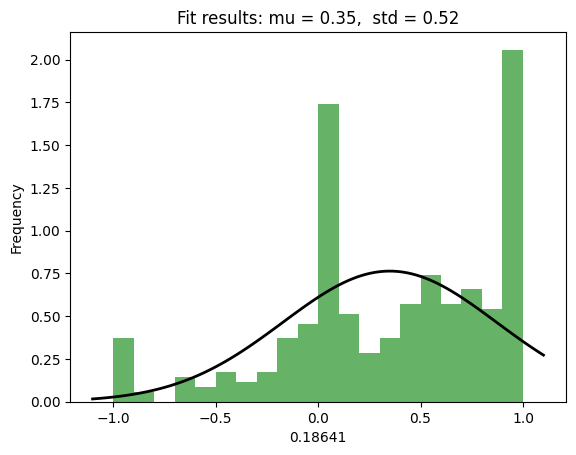

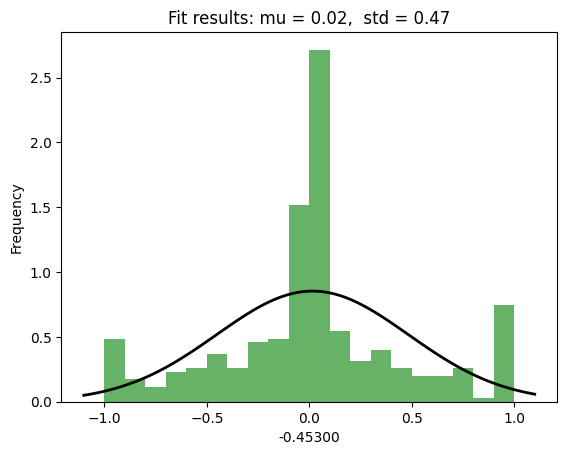

In [207]:
# prompt: show the histogram for all features and plt gaussian distribution on that


for col in df.columns:
  if df[col].dtype != 'object':
    plt.hist(df[col], bins=20, density=True, alpha=0.6, color='g')
    # Fit a normal distribution to the data:
    mu, std = norm.fit(df[col])
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [208]:
# prompt: use pca to reduce features to 3



# Separate features and target variable
X = df.drop('g', axis=1)  # Assuming 'country' is the target variable
df['g'][df['g']=='b']=0
df['g'][df['g']=='g']=1
y = df['g']



# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['g'] = y  # Add back the target variable

print(df_pca.head())


        PC1       PC2       PC3  g
0  0.766833 -1.054429 -1.393884  0
1 -1.117861 -0.392511  0.023201  1
2  0.977522  0.582971  0.443294  0
3  0.133752 -0.780181 -0.682406  1
4  1.422382 -0.053381 -0.944763  0


<ipython-input-208-1eea62b8c798>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['g'][df['g']=='b']=0
<ipython-input-208-1eea62b8c798>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['g'][df['g']=='g']=1


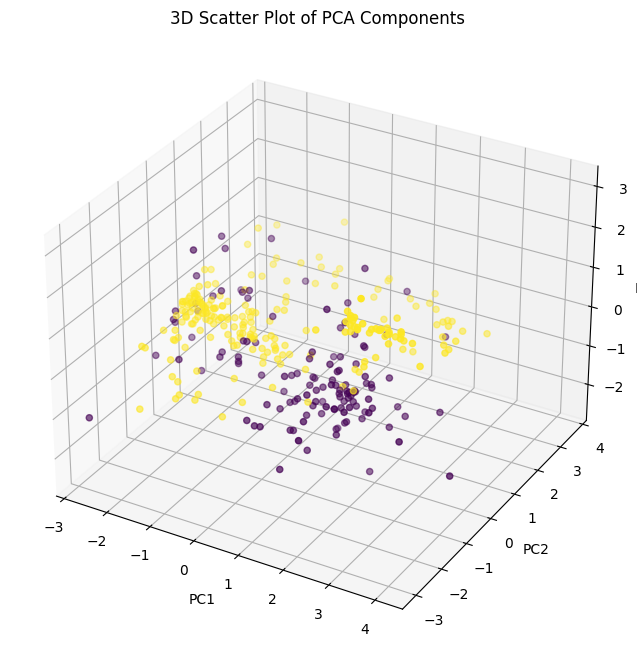

In [209]:
# prompt: scatter plot the 3d  x_pca with hue equal to country



# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the PCA components with hue based on country
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['g'].astype('category').cat.codes, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Set title for the plot
plt.title('3D Scatter Plot of PCA Components')

# Display the plot
plt.show()


In [210]:
# prompt: split df_pca into train test an dcross valid


# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_pca.drop('g', axis=1), df_pca['g'], test_size=0.2, random_state=42
)

# Further split train set into train and cross-validation sets (e.g., 75% train, 25% cross-validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Cross-validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (210, 3) (210,)
Cross-validation set shape: (70, 3) (70,)
Test set shape: (70, 3) (70,)


In [211]:
def estimate_gaussian(X):

    m, n = X.shape
    mu = 1 / m * np.sum(X, axis = 0)
    var = 1 / m * np.sum((X - mu) ** 2, axis = 0)
    return mu, var

In [212]:
mu, var = estimate_gaussian(X_train)

In [213]:
def select_threshold(y_val, p_val):


    best_epsilon = 0
    best_F1 = 0
    F1 = 0

    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):


        predictions = (p_val < epsilon)
        fp = sum((predictions == 1) & (y_val == 0))
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        tn=np.sum((predictions==0) & (y_val==0))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)


        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon

    return best_epsilon, best_F1

In [214]:
# Calculate the probability density function for each point in the validation set
p_val = multivariate_normal.pdf(X_val, mean=mu, cov=var)


In [215]:

epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)



<ipython-input-213-4df653381bbb>:18: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp / (tp + fp)


Best epsilon found using cross-validation: 3.858540e-02
Best F1 on Cross Validation Set: 0.880000


<ipython-input-216-5087d7440de9>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = norm.pdf(x, mu[i], np.sqrt(var[i]))


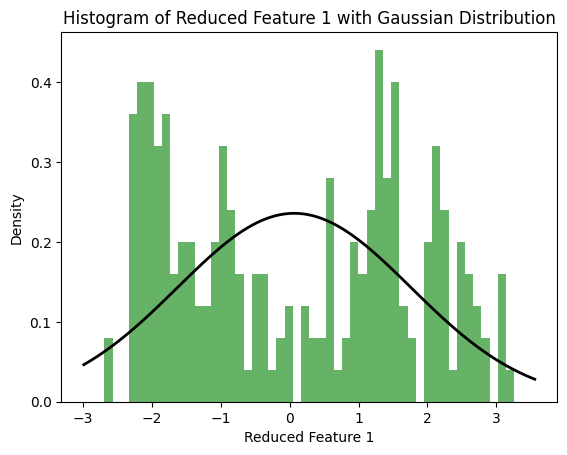

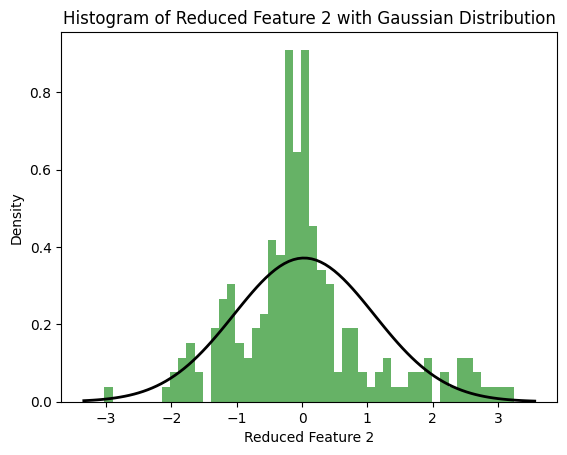

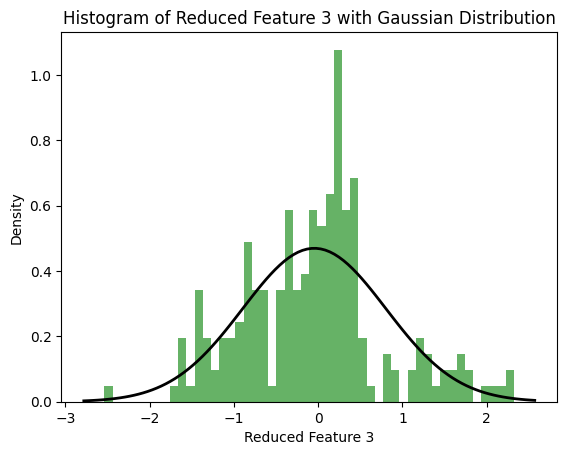

In [216]:
# prompt: plot the histogram of reduced feature with gaussian distribution

# Calculate the probability density function for the training set
p_train = multivariate_normal.pdf(X_train, mean=mu, cov=var)

# Plot histograms for each reduced feature with Gaussian distribution
for i in range(X_train.shape[1]):
    plt.figure()
    plt.hist(X_train.iloc[:, i], bins=50, density=True, alpha=0.6, color='g')

    # Plot the Gaussian distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu[i], np.sqrt(var[i]))
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(f"Histogram of Reduced Feature {i+1} with Gaussian Distribution")
    plt.xlabel(f"Reduced Feature {i+1}")
    plt.ylabel("Density")
    plt.show()


In [217]:

# Apply log transformation to PC1, handling potential zeros or negative values
X_train['PC1'] =X_train['PC1']**3





<ipython-input-218-8346ab8e31ca>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = norm.pdf(x, mu[i], np.sqrt(var[i]))


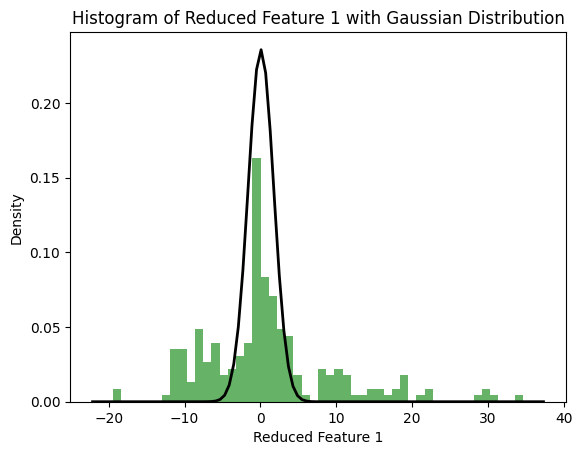

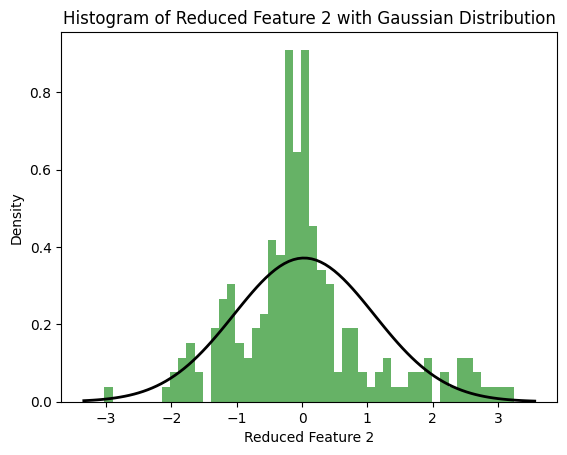

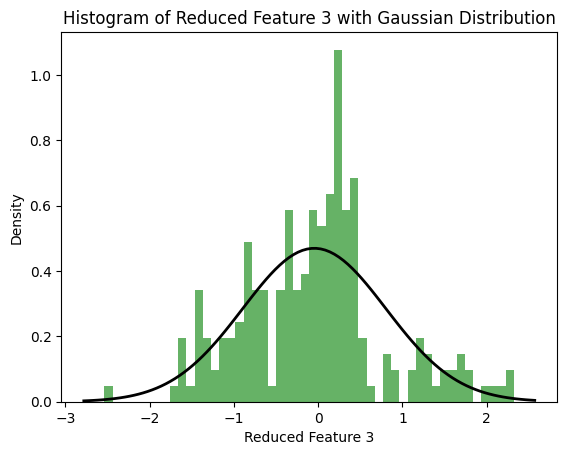

In [218]:
p_train = multivariate_normal.pdf(X_train, mean=mu, cov=var)

# Plot histograms for each reduced feature with Gaussian distribution
for i in range(X_train.shape[1]):
    plt.figure()
    plt.hist(X_train.iloc[:, i], bins=50, density=True, alpha=0.6, color='g')

    # Plot the Gaussian distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu[i], np.sqrt(var[i]))
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(f"Histogram of Reduced Feature {i+1} with Gaussian Distribution")
    plt.xlabel(f"Reduced Feature {i+1}")
    plt.ylabel("Density")
    plt.show()

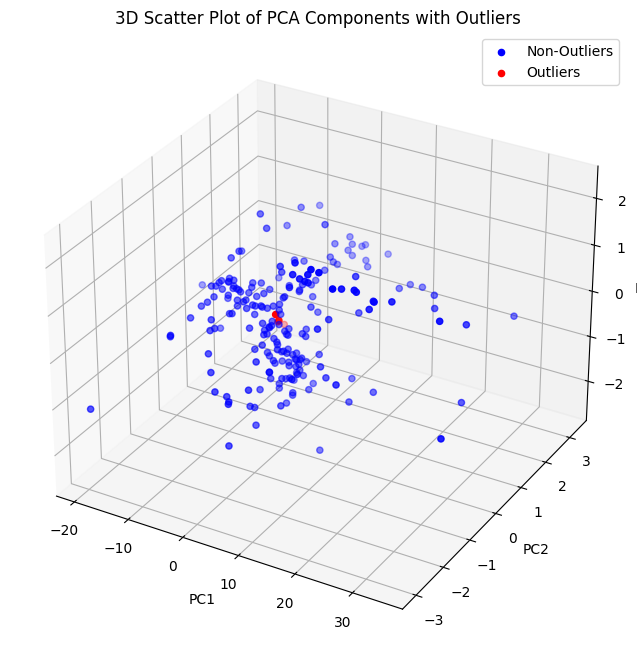

In [220]:
# prompt: plot the outliers in 3d dataset

# Calculate the probability density function for each point in the training set
p_train = multivariate_normal.pdf(X_train, mean=mu, cov=var)

# Identify outliers in the training set
outliers_train = X_train[p_train> epsilon]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the non-outlier PCA components
ax.scatter(X_train[p_train <= epsilon]['PC1'],
           X_train[p_train <= epsilon]['PC2'],
           X_train[p_train <= epsilon]['PC3'],
           c='blue', label='Non-Outliers')

# Scatter plot the outlier PCA components in red
ax.scatter(outliers_train['PC1'],
           outliers_train['PC2'],
           outliers_train['PC3'],
           c='red', label='Outliers')

# Set labels for the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Set title for the plot
plt.title('3D Scatter Plot of PCA Components with Outliers')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [221]:
len(outliers_train)

4

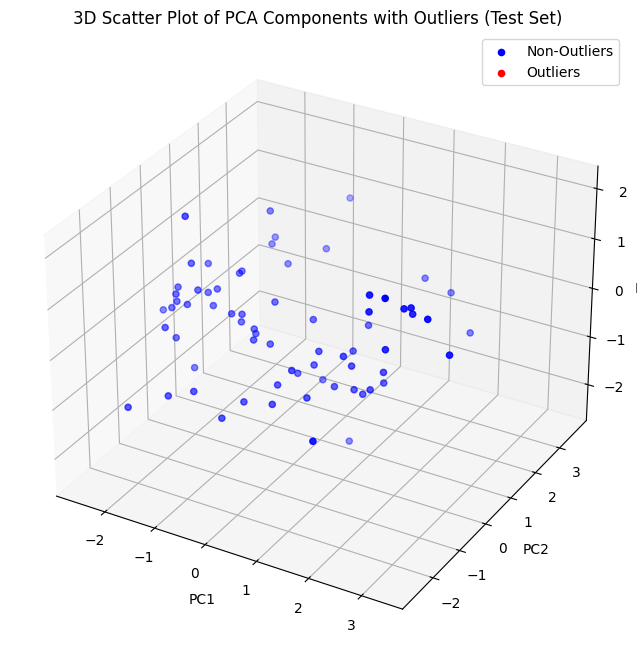

Number of outliers in test set: 0


In [222]:
# prompt: find the outliers in test data and plot them

# Calculate the probability density function for the test set
p_test = multivariate_normal.pdf(X_test, mean=mu, cov=var)

# Identify outliers in the test set
outliers_test = X_test[p_test > epsilon]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the non-outlier PCA components
ax.scatter(X_test[p_test <= epsilon]['PC1'],
           X_test[p_test <= epsilon]['PC2'],
           X_test[p_test <= epsilon]['PC3'],
           c='blue', label='Non-Outliers')

# Scatter plot the outlier PCA components in red
ax.scatter(outliers_test['PC1'],
           outliers_test['PC2'],
           outliers_test['PC3'],
           c='red', label='Outliers')

# Set labels for the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Set title for the plot
plt.title('3D Scatter Plot of PCA Components with Outliers (Test Set)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

print("Number of outliers in test set:", len(outliers_test))
